Ridge regularization, also known as L2 regularization, is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function that penalizes large coefficients. This penalty term is proportional to the square of the magnitude of the coefficients, thus encouraging smaller coefficient values.

Let's illustrate ridge regularization with an example using linear regression:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error



In [3]:
# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40))
y_true = np.sin(X) + np.random.randn(40) * 0.1



In [5]:
print(X)
print(y_true)

[0.093949   0.10109199 0.35518029 0.4356465  0.59137213 0.71676644
 1.32277806 1.91720759 2.0733097  2.118274   2.18793606 2.28075166
 2.30739681 2.60924161 2.6444746  2.72441591 2.74406752 2.84022281
 2.84216974 3.01381688 3.06047861 3.08466998 3.08817749 3.19960511
 3.22947057 3.4091015  3.57594683 3.87116845 3.89078375 3.90264588
 3.95862519 3.99579282 4.16309923 4.35006074 4.458865   4.62798319
 4.71874039 4.72334459 4.8183138  4.89309171]
[ 0.00503228 -0.09715976  0.31296819  0.4376315   0.68052972  0.7771882
  0.93066813  0.91036695  0.77151952  0.7118384   0.64491002  0.95346853
  0.68979132  0.46375301  0.35161487  0.48292998  0.22574786  0.27555457
  0.20542219  0.16611862  0.02994461 -0.06117128  0.05057155 -0.01514673
 -0.08111313 -0.23408252 -0.48425685 -0.70282758 -0.74829272 -0.7256398
 -0.81043278 -0.92667407 -0.83515293 -0.9752522  -1.1310544  -0.95016172
 -1.09070967 -0.99474545 -0.92148615 -0.97081935]


In [7]:
# Fit a high-degree polynomial (degree 10) without regularization
degree = 10
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0))  # Setting alpha to 0 for no regularization
model.fit(X[:, np.newaxis], y_true)
y_pred = model.predict(X[:, np.newaxis])



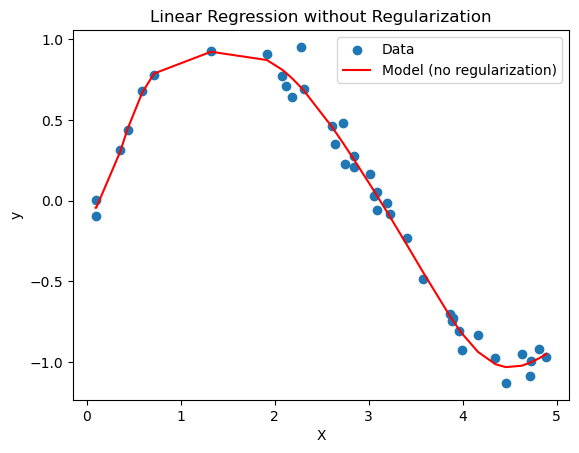

In [8]:
# Plot the data and the fitted curve without regularization
plt.scatter(X, y_true, label='Data')
plt.plot(X, y_pred, color='red', label='Model (no regularization)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression without Regularization')
plt.legend()
plt.show()



In [9]:
# Calculate mean squared error without regularization
mse_no_reg = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (no regularization):", mse_no_reg)



Mean Squared Error (no regularization): 0.005022037220271307


In [12]:
# Fit a high-degree polynomial (degree 10) with ridge regularization
alpha = 1000  # Regularization strength
model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
model_ridge.fit(X[:, np.newaxis], y_true)
y_pred_ridge = model_ridge.predict(X[:, np.newaxis])



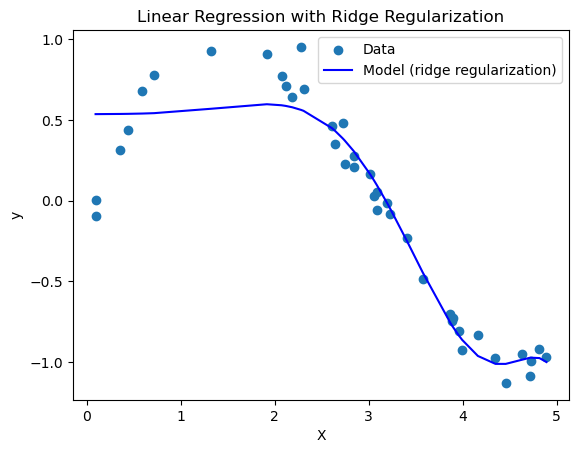

In [13]:
# Plot the data and the fitted curve with ridge regularization
plt.scatter(X, y_true, label='Data')
plt.plot(X, y_pred_ridge, color='blue', label='Model (ridge regularization)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Ridge Regularization')
plt.legend()
plt.show()



In [14]:
# Calculate mean squared error with ridge regularization
mse_ridge = mean_squared_error(y_true, y_pred_ridge)
print("Mean Squared Error (ridge regularization):", mse_ridge)


Mean Squared Error (ridge regularization): 0.0355461890098278


In this example, we first fit a high-degree polynomial (degree 10) to the data without regularization. Then, we fit the same polynomial with ridge regularization applied (alpha=1.0).

Ridge regression penalizes large coefficient values, forcing them to be smaller, which helps prevent overfitting. The alpha parameter controls the strength of regularization: larger values of alpha result in stronger regularization. By comparing the mean squared errors, you can observe the effect of ridge regularization on model performance.